In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [66]:
df = pd.read_csv(r"C:\Users\asnav\OneDrive\Documents\MachineLearningProjects\Kodbud\salary_prediction\eda_data.csv")

In [67]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [68]:
print("Shape of dataset:", df.shape)

Shape of dataset: (742, 33)


In [69]:
print("\nColumns:\n", df.columns)


Columns:
 Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')


In [70]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64


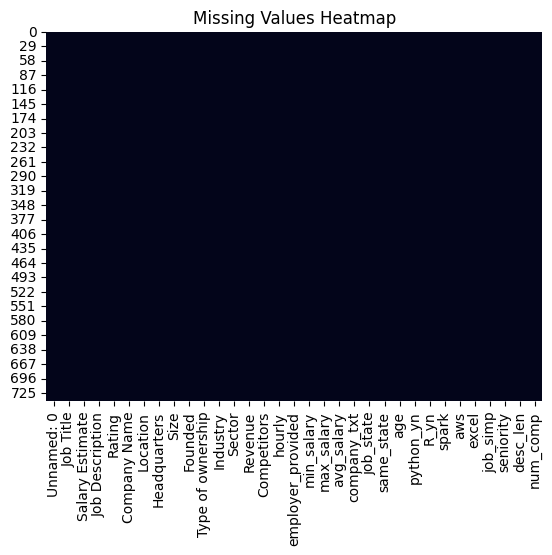

In [71]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

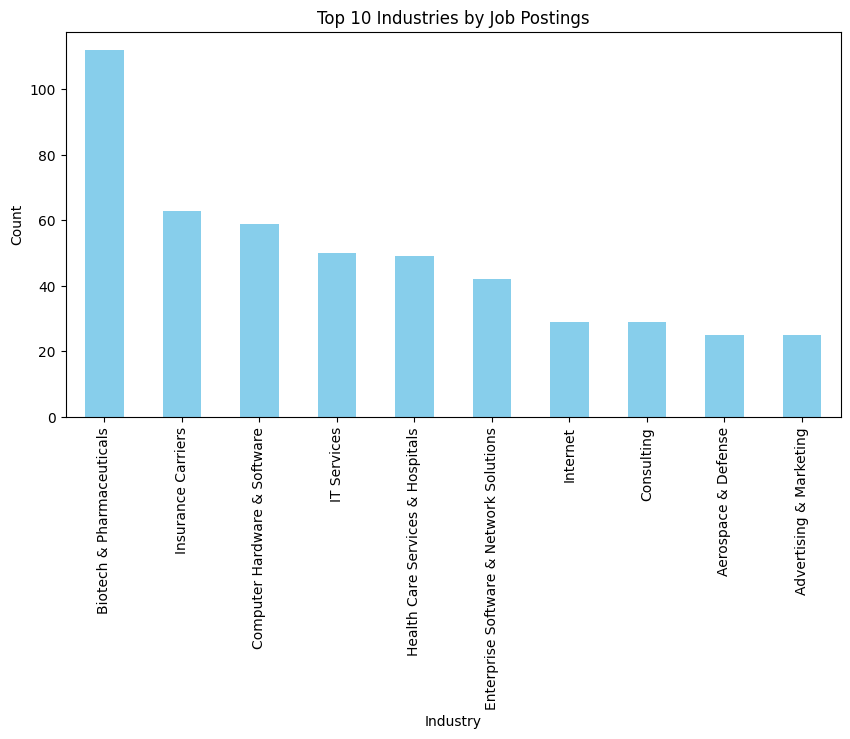

In [72]:
# Top 10 industries by number of job postings
plt.figure(figsize=(10, 5))
df['Industry'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Industries by Job Postings')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()

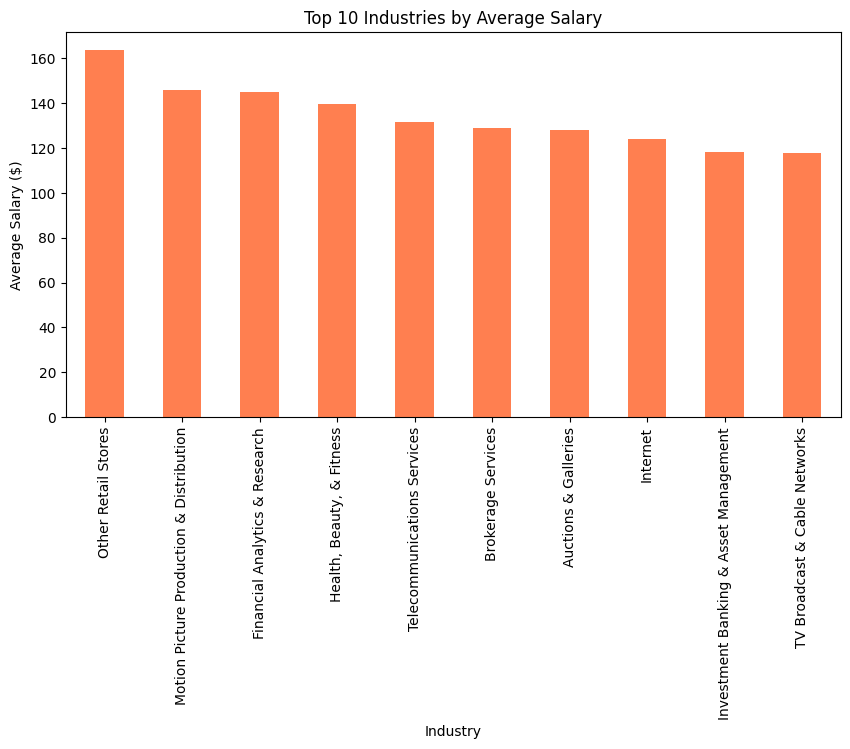

In [73]:
# Top 10 industries by average salary
plt.figure(figsize=(10, 5))
df.groupby('Industry')['avg_salary'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Industries by Average Salary')
plt.xlabel('Industry')
plt.ylabel('Average Salary ($)')
plt.show()

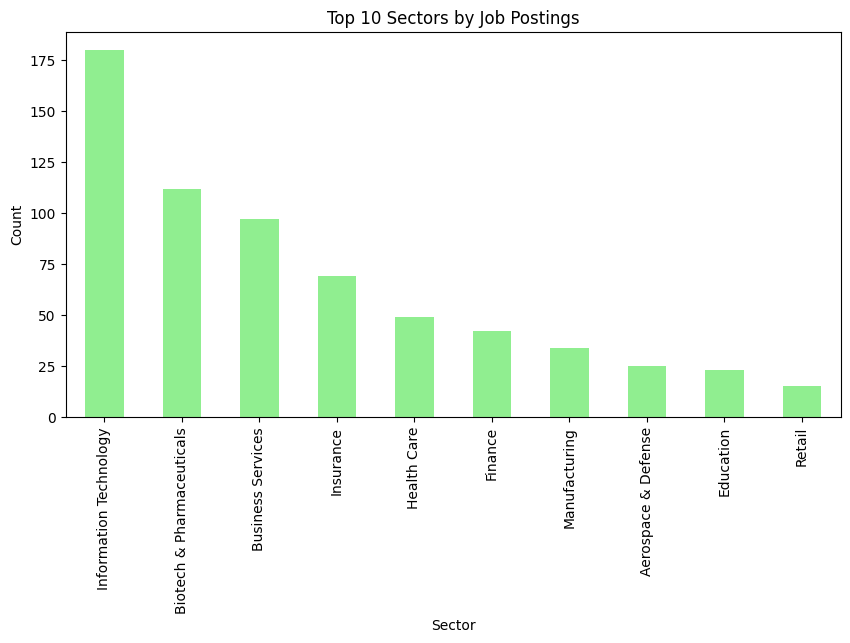

In [74]:
# Top 10 sectors by number of job postings
plt.figure(figsize=(10, 5))
df['Sector'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Sectors by Job Postings')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.show()

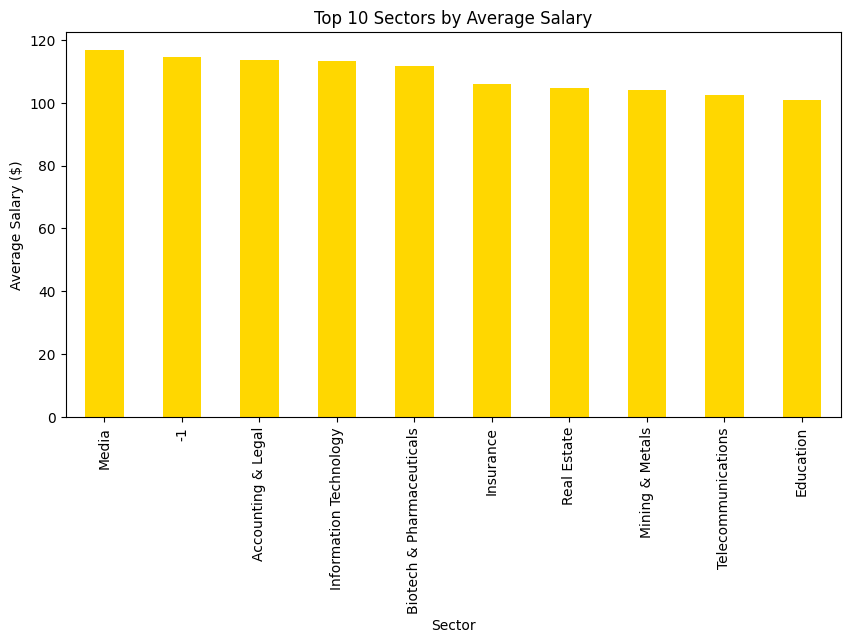

In [75]:
# Top 10 sectors by average salary
plt.figure(figsize=(10, 5))
df.groupby('Sector')['avg_salary'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='gold')
plt.title('Top 10 Sectors by Average Salary')
plt.xlabel('Sector')
plt.ylabel('Average Salary ($)')
plt.show()

In [76]:
df_model = df.drop(['Job Title', 'Salary Estimate', 'Company Name', 'Location', 'Competitors'], axis=1, errors='ignore')

In [77]:
cols_to_drop = ['Salary Estimate', 'min_salary', 'max_salary']
df_clean = df_model.drop(columns=cols_to_drop, axis=1, errors='ignore')

In [78]:
# One-hot encoding for categorical variables
df_dum = pd.get_dummies(df_clean, drop_first=True)

In [79]:
X = df_dum.drop('avg_salary', axis=1)
y = df_dum['avg_salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred_lr = lin_reg.predict(X_test)

In [ ]:
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("\n--- Linear Regression Results ---")
print("R² Score:", round(r2_lr, 3))
print("Mean Squared Error:", round(mse_lr, 2))
print("Mean Absolute Error:", round(mae_lr, 2))


--- Linear Regression Results ---
R² Score: 0.852
Mean Squared Error: 242.56
Mean Absolute Error: 7.16


In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-5, 1e-3, 1e-1, 1, 10, 20, 30, 40, 50]}
ridge_cv = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_cv.fit(X_train, y_train)

print("\nBest alpha for Ridge Regression:", ridge_cv.best_params_)
print("Best R² Score (CV):", round(ridge_cv.best_score_, 3))

# Predictions
y_pred_ridge = ridge_cv.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n--- Ridge Regression Results ---")
print("R² Score:", round(r2_ridge, 3))
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred_ridge), 2))


Best alpha for Ridge Regression: {'alpha': 0.1}
Best R² Score (CV): 0.756

--- Ridge Regression Results ---
R² Score: 0.852
Mean Squared Error: 241.56


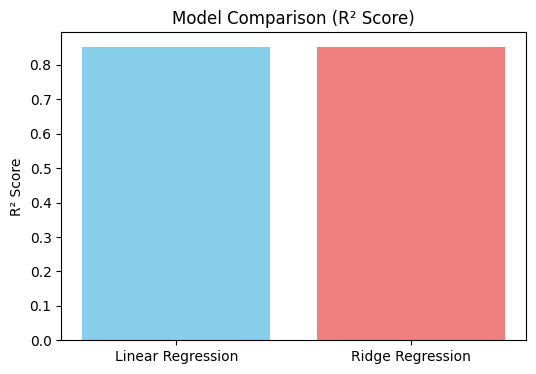

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Linear Regression', 'Ridge Regression'], [r2_lr, r2_ridge], color=['skyblue', 'lightcoral'])
plt.title('Model Comparison (R² Score)')
plt.ylabel('R² Score')
plt.show()